# Project Phase One - Used Car Prices in United States

## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.


## Topic 

I would like to better understand how different variables influence the price of used vehicles.
During COVID-19 supply problems, used car prices increased significantly when new car availability decreased which caused some of my curiosity in this area.

Additionally, I have always been interested in cars overall, and have bought and sold a number of older and sometimes antique vehicles, and it would be of practical use to be better able to understand what is a fair price.

This purpose is also applicable to user car vendors, consumers selling their used vehicles privately or as trade-ins, new car dealerships purchasing trade-in vehicles, and car information websites such as [edmunds.com](http://www.edmunds.com) and [Kelly Blue Book](http://www.kbb.com) that provide price range information for vehicles based on vehicle details.

I want to investigate what factors influence used car prices compared to the obvious ones of age and odomoter mileage. I also want to understand other relationships between variables such as how much make and model affects the price for different age vehicles compared to the condition, or how much location affects the price of similar vehicles.

I am interested exploring a regression problem on tabular data with different types of input features since I have more experience to date with classification.

I think this is a good topic to expand my experience with visualization techniques, gain experience with practical data preparation, and practice using relevant libraries and frameworks, especially scikit-learn, Pandas, and XGBoost.

Particular techniques I want to investigate in part two of this project are

- Basic regression techniques for this problem, such as linear, ridge and lasso regression
- Regression using ensemble models, such as Random Cut Forest and XGBoost
- Feature selection techniques.
    - Using Random Forest and/or XGBoost model to evaluate feature importance.

In addition to the already described objectives, if time permits, I plan to choose the best performing regression model and embed it into a [Streamlit](https://streamlit.io/) project to create a web tool which can take a set of inputs and predict the price of a used car.


## Datasets Available

There are a number of datasets available related to used cars listing or sales. They have different features, different sizes of samples and some are more prepared and preprocessed than others.

These relevant datasets located include:

- **Cargurus:** <https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset>
    - This dataset contains rows with 66 columns for three million user car listings.
    - This dataset was created from Cargurus inventory in September 2020 using a crawler built by the owner of the Kaggle dataset.
- **TrueCar:** https://www.kaggle.com/datasets/jpayne/852k-used-car-listings
    - The provider created this dataset by scraping TrueCar.com for used car listings on 9/24/2017.
    - Columns include year, make, model, price, VIN, city, state
- **Craigslist:** https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
    - This dataset was created by the provider scraping data from Craigslist car listings.
    - The columns include price, condition, manufacturer, and latitude/longitude plus 18 other categories.
- **Carvana:** https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices
    - This data is based on Carvana car sales, and only contains about 22,000 rows with four columns.
- **USDOT:** https://catalog.data.gov/dataset/auto-sales
    - This is available through the government bts.gov system at <https://data.bts.gov/Research-and-Statistics/Auto-Sales/7n6a-n5tz>. It seems to be primarily a historic aggregate time series of new car sales in the USA. It is part of the monthly transportation statistics published by the US Department of Transportation. It does not seem very useful to the objectives of this project. It does provide some contextual timeseries data for volume of new cars to compare against used car prices by year.

Before completing exploratory data analysis it seems likely that the Cargurus and/or Craigslist datasets would be most useful for this analysis, but this also depends on the quality of the data and effort required to prepare it within the available time so the final choice will be based on the phase one report.


## Analysis of Datasets

### Note on Datasets

*Note* that the code in the cells below will not run unless the data is downloaded and unzipped in advance.

The code expects a dataset directory with the following structure:

```bash
% find datasets -name '*.csv' -or -type d
datasets
datasets/cargurus
datasets/cargurus/used_cars_data.csv
datasets/truecar
datasets/truecar/true_car_listings.csv
datasets/craigslist
datasets/craigslist/vehicles.csv
datasets/carvana
datasets/carvana/carvana.csv
datasets/usdot
datasets/usdot/Monthly_Transportation_Statistics.csv
```

ALl of the CSV filenames are the original names from the ZIP filenames at the Kaggle URLs listed in the cell above.

### Size of Datasets

```bash
% find . -name '*.csv' | xargs wc -l
 3000599 ./datasets/cargurus/used_cars_data.csv
 1233043 ./datasets/truecar/tc20171021.csv
  852123 ./datasets/truecar/true_car_listings.csv
  426881 ./datasets/craigslist/vehicles.csv
   22001 ./datasets/carvana/carvana.csv
     914 ./datasets/usdot/Monthly_Transportation_Statistics.csv
```


## New Car Sales vs Used Cars

Since the US DOT data from bts.gov is an aggregate, monthly timeseries it will not directly help in our regression problem. This is even more true because no datasets were located that contain samples of used car prices over different points in time, rather than a point in time snapshot, so there is no way with the data we found to investigate relationships over time between new car sales and used car prices.

The graph below from the bts.gov based on data collected by the US Department of transportation shows new car sales volume by month.
![Monthly new car sales](images/monthly_new_car_sales.png)

## Exploratory Data Analysis 

An analysis of the characteristics of one of the datasets is shown below using the included code cells and outputs with visualizations.

The code is structured so that the majority of it can be, and was, used to investigate and visualize the data from all four of the used car datasets.  However, for reasons discussed in our summary and brevity, we only include the results for the Craigslist dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))
    

In [5]:
# This is the configuration for each dataset.
# We drop any columns which are obviously not going to be useful to use for data analysis or regression upon load,
# For example, VIN numbers and URLs to images.

datasets = {
    'carvana': {
        'title': "Carvana",
        'path': "datasets/carvana/carvana.csv",
        'sample': False,
        'drop_cols': []
    },
    'craigslist': {
        'title': "Craigslist",
        'path': "datasets/craigslist/vehicles.csv",
        'sample': True,
        'drop_cols': ['id','url','region','VIN','region_url','county','lat','long','description','image_url','posting_date']
    },
    'cargurus': {
        'title': "Cargurus",
        'path': "datasets/cargurus/used_cars_data.csv",
        'sample': True,
        'drop_cols': ['vin', 'description', 'listing_id', 'major_options', 'wheel_system','trimId', 'sp_id', 'main_picture_url', 'latitude', 'longitude']
    },
    'truecar': {
        'title': "TrueCar",
        'path': "datasets/truecar/true_car_listings.csv",
        'sample': True,
        'drop_cols': ['Vin']
    }
}

In [6]:
# NOTE: This is where you select the dataset.

#use_dataset = 'cargurus'
use_dataset = 'craigslist'
#use_dataset = 'carvana'
#use_dataset = 'truecar'

dataset = datasets[use_dataset]
dataset_title = dataset['title']
ds_path = dataset['path']


In [7]:
if dataset['sample']:
    p = 0.01  # Keep 1% of the data for faster experimentation in phase 1.
    orig_df = pd.read_csv(
         ds_path,
         header=0, 
         low_memory=False,
         skiprows=lambda i: i>0 and random.random() > p
    )
else:
    orig_df = pd.read_csv(ds_path, low_memory=False)

In [8]:
def describe_col(colname, df):
    show_heading("Column: {}".format(colname))

    if is_numeric_dtype(df[colname]):    
        print("Numeric")
        if df[colname].dtype == 'int64':
            fmt = "{0:.0f}"
        else:
            fmt = "{0:.5f}"
    else:
        if is_string_dtype(df[colname]):
            print("String")
        else:
            print("Other")
        fmt = "{}"
    d = df[colname].describe().apply(fmt.format)
    display(d)

In [34]:
def describe_data(title, df, verbose=True):
    show_heading("Dataset Name: {}".format(title), size='1')

    show_heading("Info", size=3)
    print("Shape:", df.shape)
    display(df.info())
    
    show_heading("Sample", size=3)
    pd.set_option('display.max_columns', None)
    display(df.head())
    
    show_heading("Types", size=3)
    display(df.dtypes)

    show_heading("Null Proportion", size=3)
    null_ratio = df.isnull().sum()/len(df.index)
    display(null_ratio)

    if verbose:
        for colname in df.columns:
            describe_col(colname, df)

In [26]:
# Drop any columns we don't want and set df var.
df = orig_df

print("Original Columns:", df.columns)
if dataset['drop_cols']:
    df = orig_df.drop(columns=dataset['drop_cols'])
    print("Using Columns:", df.columns)

Original Columns: Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')
Using Columns: Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


In [35]:
# Describe the dataset.
describe_data(dataset_title, df, verbose=False)

Dataset Name: Craigslist

Info

Shape: (4365, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4365 non-null   int64  
 1   year          4354 non-null   float64
 2   manufacturer  4176 non-null   object 
 3   model         4303 non-null   object 
 4   condition     2623 non-null   object 
 5   cylinders     2525 non-null   object 
 6   fuel          4332 non-null   object 
 7   odometer      4311 non-null   float64
 8   title_status  4290 non-null   object 
 9   transmission  4342 non-null   object 
 10  drive         3032 non-null   object 
 11  size          1251 non-null   object 
 12  type          3372 non-null   object 
 13  paint_color   3029 non-null   object 
 14  state         4365 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 511.6+ KB


None

Sample

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,2007.0,mercedes-benz,e320 cdi,good,6 cylinders,diesel,124000.0,clean,automatic,rwd,NaN,sedan,blue,al
1,34995,2018.0,ram,2500,NaN,NaN,diesel,211000.0,clean,automatic,4wd,NaN,NaN,NaN,al
2,1200,2005.0,chevrolet,impala,fair,4 cylinders,gas,256806.0,clean,automatic,fwd,mid-size,sedan,blue,al
3,27995,2012.0,ford,f250 super duty,NaN,NaN,gas,26896.0,clean,automatic,NaN,NaN,NaN,white,al
4,3999,2006.0,pontiac,grand prix,NaN,6 cylinders,gas,207238.0,clean,automatic,fwd,NaN,sedan,white,al


Types

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion

price           0.000000
year            0.002520
manufacturer    0.043299
model           0.014204
condition       0.399084
cylinders       0.421535
fuel            0.007560
odometer        0.012371
title_status    0.017182
transmission    0.005269
drive           0.305384
size            0.713402
type            0.227491
paint_color     0.306071
state           0.000000
dtype: float64

In [12]:
def show_pair_plots(df):
    show_heading("Pair Plots")
    # hue='Name', 
    
    df = df.copy()
    # preprocess to convert booleans
    for colname in df.columns:
        if df[colname].dtype == 'bool':
            print('bool col:', colname)
            df[colname] = df[colname].replace({True: 1, False: 0})
            
    g = sns.pairplot(df, diag_kind='hist', height=2.5);

    plt.show()

In [13]:
def zscore(data):
    mean = np.mean(data)
    stdev = np.std(data)
    
    standardized_data = (data - mean) / stdev
    
    return standardized_data

In [14]:
def show_col_box_plots(df, rescale=True):
    show_heading("Box Plots (normalized)" if rescale else "Box Plots")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn])]

    fig, axes = plt.subplots(ncols=len(columns_to_plot))

    df = df.copy()
    df = df.fillna(0)

        
    for column, axis in zip(columns_to_plot, axes):
        data = df[column]
        if rescale:
            data = zscore(data)
        sns.boxplot(data=data, ax=axis) 
        axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [15]:
def show_col_hist(df):
    show_heading("Histograms")
    columns_to_plot = [cn for cn in df.columns if is_numeric_dtype(df[cn])]

    fig, axes = plt.subplots(ncols=len(columns_to_plot))

    for column, axis in zip(columns_to_plot, axes):
            sns.histplot(data=df[column], kde=True, ax=axis, bins=20)
            axis.set_title(column)

    plt.tight_layout()
    plt.show()


In [37]:
def show_bar_plots(df):
    colnames = [cn for cn in df.columns if not is_numeric_dtype(df[cn])]

    n_uniq = df[colnames].nunique()

    show_heading("Column unique counts", size=4)
    print([(c,n) for c,n in zip(colnames, n_uniq)])

    MAX_BAR_VALUES = 50
    keeping = [c for c,n in zip(colnames, n_uniq) if n <= MAX_BAR_VALUES]
    topn_colnames = [c for c,n in zip(colnames, n_uniq) if n > MAX_BAR_VALUES]
    
    counts = {c: n for c,n in zip(colnames, n_uniq)}

    if len(colnames) == 0:
        return
    show_heading("Bar Charts")
   
    n_cols = 2
    n_rows = (len(colnames) + n_cols - 1) // n_cols
    
    
    fig = plt.figure(figsize=(12, n_rows * 7))
    for idx, column in enumerate(colnames):
        axis = fig.add_subplot(n_rows, n_cols, idx + 1)
        
        data = df[column]
            
        if counts[column] > MAX_BAR_VALUES:
            g = sns.countplot(y=data, ax=axis, order=pd.value_counts(df[column]).iloc[:MAX_BAR_VALUES].index)
            axis.set_title("Top {}: {}".format(MAX_BAR_VALUES, column))
        else:
            data = df[column]
            g = sns.countplot(y=data, ax=axis)
            axis.set_title(column)
        
    plt.suptitle("Categorical Features")
    
    plt.rcParams['figure.constrained_layout.use'] = True

    plt.show()


In [17]:
def show_correlation(df, show_heatmap=True):
    show_heading("Correlation Heatmap")  

    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            #print("norm:", colname)
            df[colname] = zscore(df[colname])
        else:
            #print("cat:", colname)
            df[colname] = df[colname].astype("category").cat.codes
    
    display(df.corr(numeric_only=False))
    if show_heatmap:
        sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1) #, annot=True)
        plt.show()


Correlation Heatmap

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,0.267085,-0.051286,0.029643,0.071200,-0.010712,-0.078727,-0.113833,-0.072151,0.227669,-0.079587,-0.170715,0.099585,0.044649,-0.014845
year,0.267085,1.000000,0.063659,0.101402,0.007819,-0.136786,0.078559,-0.152445,-0.020098,0.111963,-0.067243,-0.126340,0.139561,0.062523,0.000779
manufacturer,-0.051286,0.063659,1.000000,0.057095,-0.023646,-0.027465,0.003968,0.000645,0.003052,0.000405,-0.040460,-0.018984,0.036697,0.002139,-0.017804
model,0.029643,0.101402,0.057095,1.000000,-0.018134,0.003707,0.057213,-0.011200,-0.044531,-0.024561,-0.061601,-0.032875,-0.030548,0.022430,0.025947
condition,0.071200,0.007819,-0.023646,-0.018134,1.000000,0.251244,0.168990,-0.034720,0.033827,0.407438,0.188861,0.165844,0.179271,0.162128,-0.023111
cylinders,-0.010712,-0.136786,-0.027465,0.003707,0.251244,1.000000,-0.102119,0.027352,0.044753,-0.057588,0.317788,0.364347,0.198416,0.175181,-0.004031
fuel,-0.078727,0.078559,0.003968,0.057213,0.168990,-0.102119,1.000000,-0.087071,0.004226,0.237141,0.010792,-0.068816,0.011953,0.010869,-0.022418
odometer,-0.113833,-0.152445,0.000645,-0.011200,-0.034720,0.027352,-0.087071,1.000000,0.002484,-0.076487,-0.006305,0.050903,-0.013708,-0.034178,0.001024
title_status,-0.072151,-0.020098,0.003052,-0.044531,0.033827,0.044753,0.004226,0.002484,1.000000,-0.041567,0.040563,0.080043,-0.033061,0.022296,0.003091
transmission,0.227669,0.111963,0.000405,-0.024561,0.407438,-0.057588,0.237141,-0.076487,-0.041567,1.000000,0.020025,-0.206167,0.136910,0.058434,-0.014999


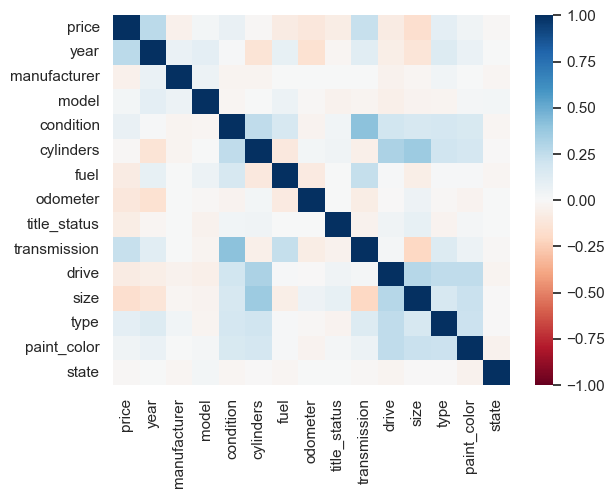

In [18]:
show_correlation(df, show_heatmap=True)

In [19]:
def visualize_data(title, df):
    show_col_box_plots(df, rescale=False)
    show_col_box_plots(df)
    show_col_hist(df)
    show_bar_plots(df)
    show_pair_plots(df)


Box Plots

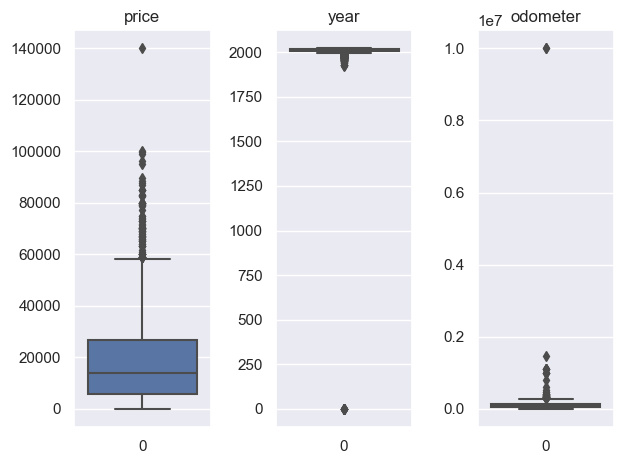

In [20]:
#visualize_data(dataset_title, df)

show_col_box_plots(df, rescale=False)

### Outliers

The above box plots for the numeric features without any rescaling show that there are some outliers that we need to cleanup.


In [21]:
# Cap outliers in numeric columns based on number of standard deviations.
def cap_outliers(df, z_mult):
    df = df.copy()
    
    for colname in df.columns:
        if is_numeric_dtype(df[colname]):
            lower_limit = df[colname].mean() - z_mult * df[colname].std()
            upper_limit = df[colname].mean() + z_mult * df[colname].std()
            print(f"Capping column: {colname} lower={lower_limit} upper={upper_limit}")
            
            df[colname] = np.where(
                df[colname] > upper_limit, upper_limit,
                np.where(
                    df[colname] < lower_limit, lower_limit,
                    df[colname]
                )
            )

    return df

In [22]:
show_heading("Data Cleaning")

df_cleaned = df.copy()

# Do some adjustments on particular columns based on meaning of columns.

# Drops rows without price information.
df_cleaned  = df_cleaned.dropna(subset=['price'])

# No zero or negative prices.
MIN_PRICE = 1
# Keep the max price to a reasonable value.
MAX_PRICE = 300000

df_cleaned = df_cleaned.drop(df[df['price'] < MIN_PRICE].index)
df_cleaned = df_cleaned.drop(df[df['price'] > MAX_PRICE].index)

# No years in the future.
MAX_YEAR = 2023
df_cleaned['year'] = np.where(df_cleaned['year'] > MAX_YEAR, MAX_YEAR, df_cleaned['year'])

# No huge odometer values.
MAX_MILES = 300000
df_cleaned['odometer'] = np.where(df_cleaned['odometer'] > MAX_MILES, MAX_MILES, df_cleaned['odometer'])

# cap outliers beyond 3 std devs.
df_cleaned = cap_outliers(df_cleaned, z_mult=3)

# Impute value for missing fields.
df_cleaned['year'] = df_cleaned['year'].fillna(df_cleaned['year'].mean())
df_cleaned['odometer'] = df_cleaned['odometer'].fillna(df_cleaned['odometer'].mean())

# TODO: replace categorical missing values with 'missing'

display(df_cleaned.describe())

Data Cleaning

Capping column: price lower=-26717.66351232329 upper=64619.16687136783
Capping column: year lower=1981.9644989915205 upper=2039.757057894707
Capping column: odometer lower=-99895.95182623432 upper=287740.0281314552


,price,year,odometer
count,4019.000000,4019.000000,4019.000000
mean,18746.418432,2011.249978,93817.513564
std,14424.394534,7.687523,64001.131487
min,1.000000,1981.964499,0.000000
25%,6999.000000,2008.000000,38712.500000
50%,15300.000000,2013.000000,89078.000000
75%,27900.000000,2017.000000,137057.500000
max,64619.166871,2021.000000,287740.028131


Dataset Name: Cleaned Craigslist

Info

Shape: (4019, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 0 to 4364
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4019 non-null   float64
 1   year          4019 non-null   float64
 2   manufacturer  3840 non-null   object 
 3   model         3965 non-null   object 
 4   condition     2499 non-null   object 
 5   cylinders     2362 non-null   object 
 6   fuel          3990 non-null   object 
 7   odometer      4019 non-null   float64
 8   title_status  3947 non-null   object 
 9   transmission  4003 non-null   object 
 10  drive         2783 non-null   object 
 11  size          1150 non-null   object 
 12  type          3104 non-null   object 
 13  paint_color   2808 non-null   object 
 14  state         4019 non-null   object 
dtypes: float64(3), object(12)
memory usage: 631.4+ KB


None

Sample

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000.0,2007.0,mercedes-benz,e320 cdi,good,6 cylinders,diesel,124000.0,clean,automatic,rwd,NaN,sedan,blue,al
1,34995.0,2018.0,ram,2500,NaN,NaN,diesel,211000.0,clean,automatic,4wd,NaN,NaN,NaN,al
2,1200.0,2005.0,chevrolet,impala,fair,4 cylinders,gas,256806.0,clean,automatic,fwd,mid-size,sedan,blue,al
3,27995.0,2012.0,ford,f250 super duty,NaN,NaN,gas,26896.0,clean,automatic,NaN,NaN,NaN,white,al
4,3999.0,2006.0,pontiac,grand prix,NaN,6 cylinders,gas,207238.0,clean,automatic,fwd,NaN,sedan,white,al


Types

price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

Null Proportion

price           0.000000
year            0.000000
manufacturer    0.044538
model           0.013436
condition       0.378204
cylinders       0.412292
fuel            0.007216
odometer        0.000000
title_status    0.017915
transmission    0.003981
drive           0.307539
size            0.713859
type            0.227669
paint_color     0.301319
state           0.000000
dtype: float64

Box Plots

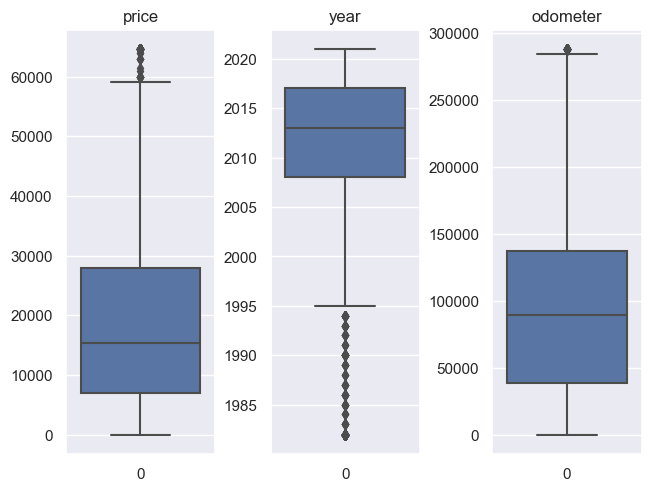

Box Plots (normalized)

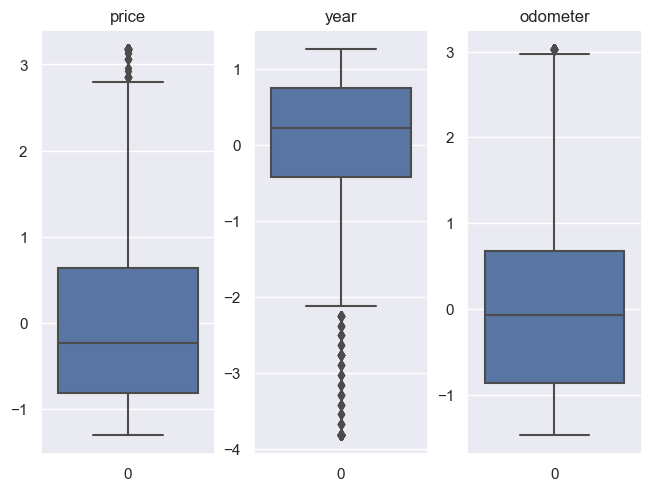

Histograms

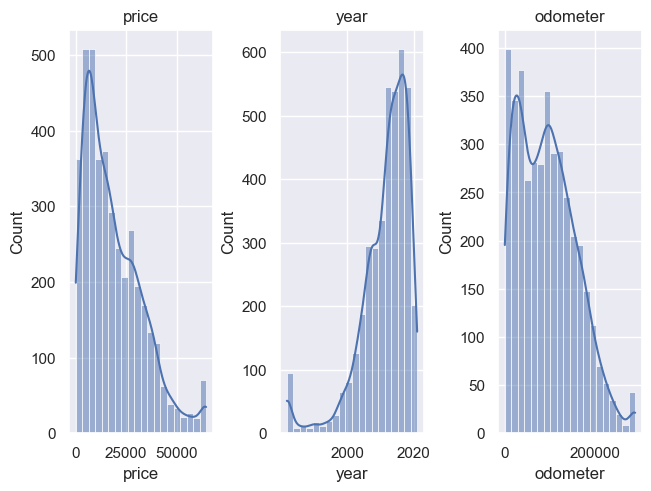

Column unique counts

[('manufacturer', 39), ('model', 1861), ('condition', 6), ('cylinders', 8), ('fuel', 5), ('title_status', 6), ('transmission', 3), ('drive', 3), ('size', 4), ('type', 13), ('paint_color', 12), ('state', 51)]


Bar Charts

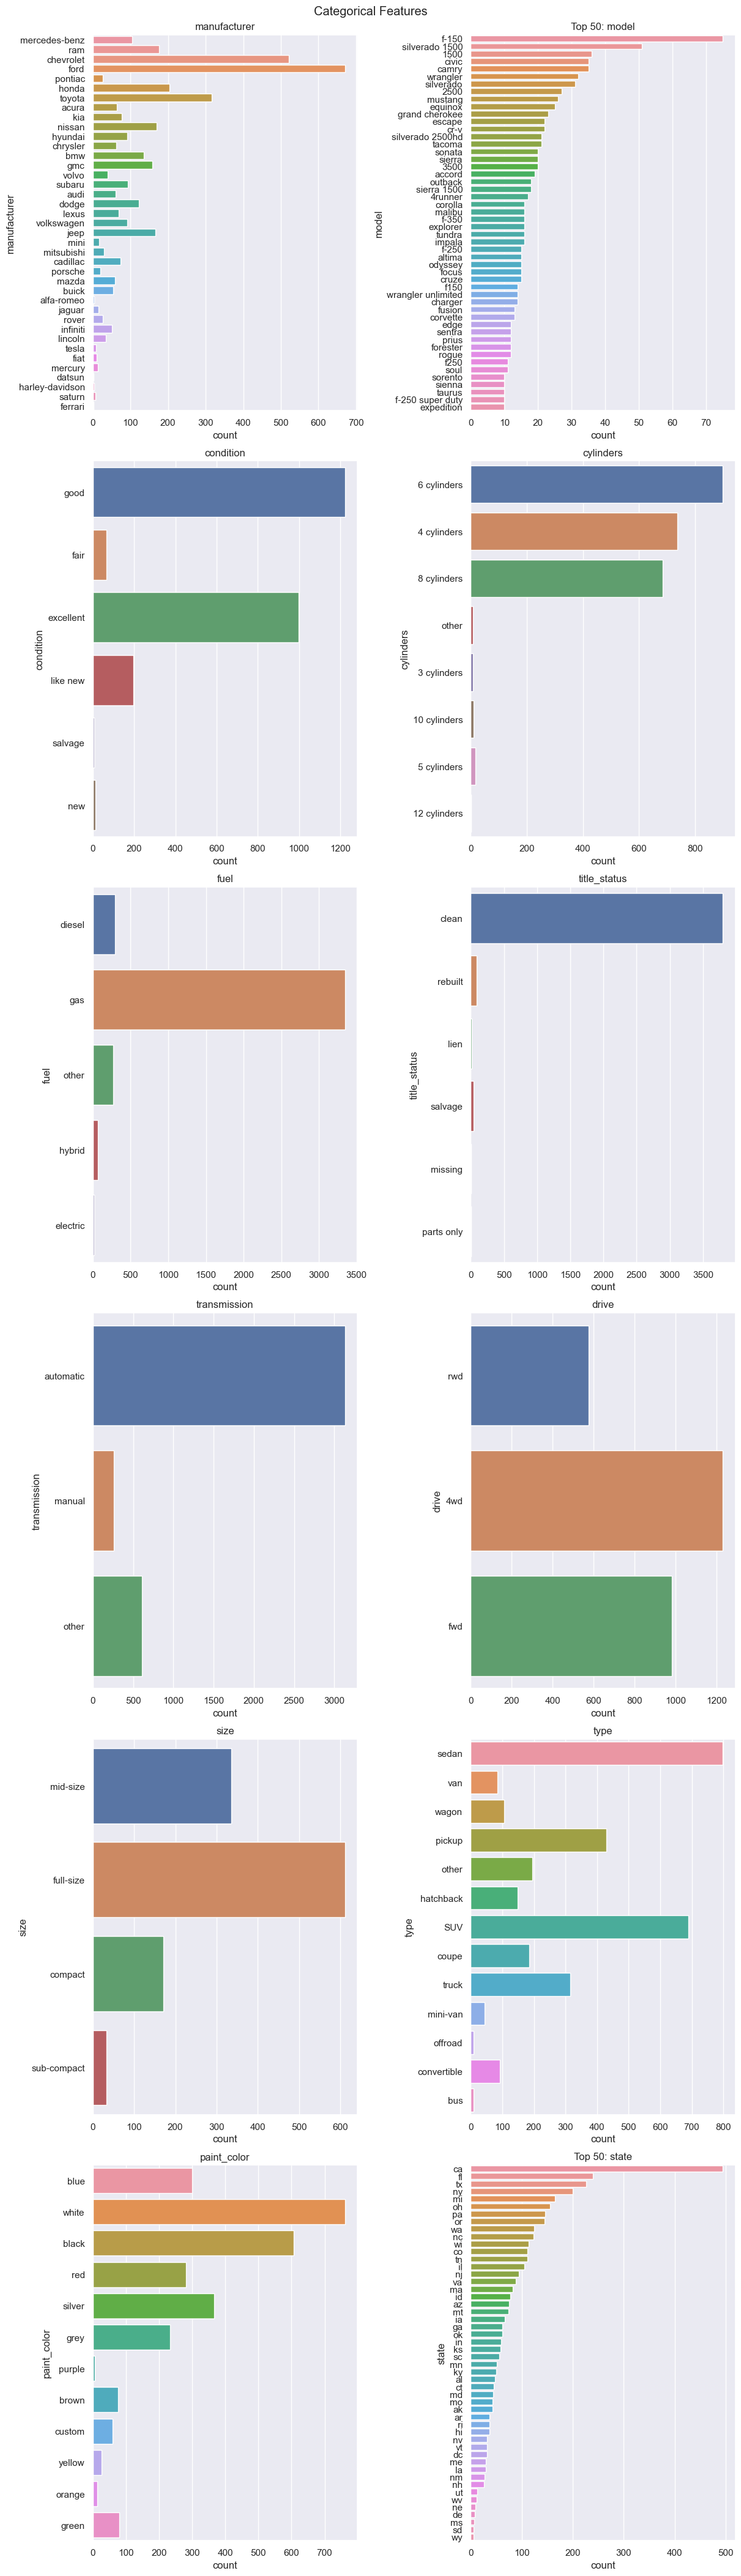

Pair Plots

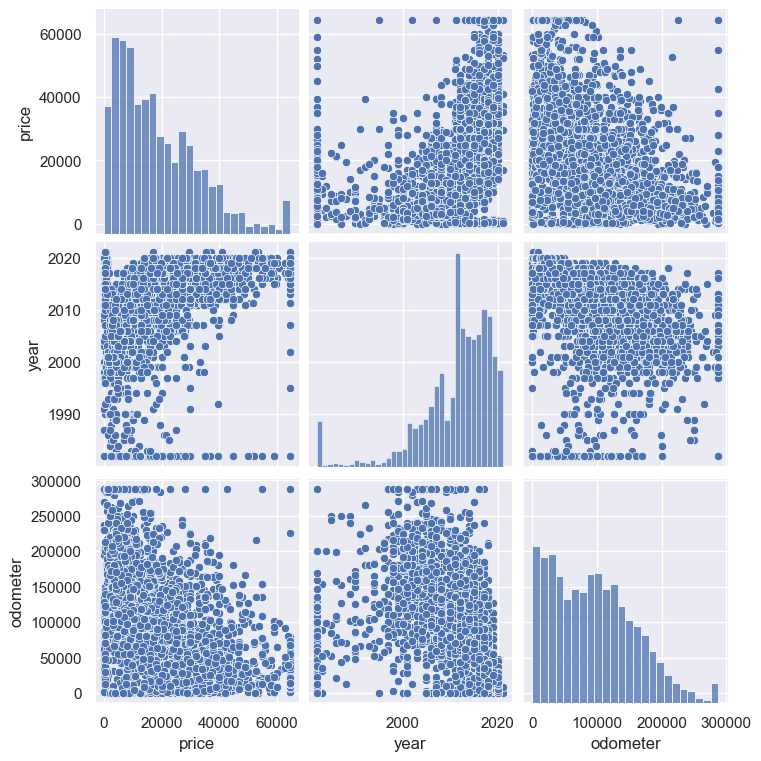

In [38]:
# NOTE: Set verbose=true to see description of each column in more detail.

describe_data("Cleaned " + dataset_title, df_cleaned, verbose=False)
visualize_data("Cleaned " + dataset_title, df_cleaned)

Correlation Heatmap

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
price,1.000000,0.267085,-0.051286,0.029643,0.071200,-0.010712,-0.078727,-0.113833,-0.072151,0.227669,-0.079587,-0.170715,0.099585,0.044649,-0.014845
year,0.267085,1.000000,0.063659,0.101402,0.007819,-0.136786,0.078559,-0.152445,-0.020098,0.111963,-0.067243,-0.126340,0.139561,0.062523,0.000779
manufacturer,-0.051286,0.063659,1.000000,0.057095,-0.023646,-0.027465,0.003968,0.000645,0.003052,0.000405,-0.040460,-0.018984,0.036697,0.002139,-0.017804
model,0.029643,0.101402,0.057095,1.000000,-0.018134,0.003707,0.057213,-0.011200,-0.044531,-0.024561,-0.061601,-0.032875,-0.030548,0.022430,0.025947
condition,0.071200,0.007819,-0.023646,-0.018134,1.000000,0.251244,0.168990,-0.034720,0.033827,0.407438,0.188861,0.165844,0.179271,0.162128,-0.023111
cylinders,-0.010712,-0.136786,-0.027465,0.003707,0.251244,1.000000,-0.102119,0.027352,0.044753,-0.057588,0.317788,0.364347,0.198416,0.175181,-0.004031
fuel,-0.078727,0.078559,0.003968,0.057213,0.168990,-0.102119,1.000000,-0.087071,0.004226,0.237141,0.010792,-0.068816,0.011953,0.010869,-0.022418
odometer,-0.113833,-0.152445,0.000645,-0.011200,-0.034720,0.027352,-0.087071,1.000000,0.002484,-0.076487,-0.006305,0.050903,-0.013708,-0.034178,0.001024
title_status,-0.072151,-0.020098,0.003052,-0.044531,0.033827,0.044753,0.004226,0.002484,1.000000,-0.041567,0.040563,0.080043,-0.033061,0.022296,0.003091
transmission,0.227669,0.111963,0.000405,-0.024561,0.407438,-0.057588,0.237141,-0.076487,-0.041567,1.000000,0.020025,-0.206167,0.136910,0.058434,-0.014999


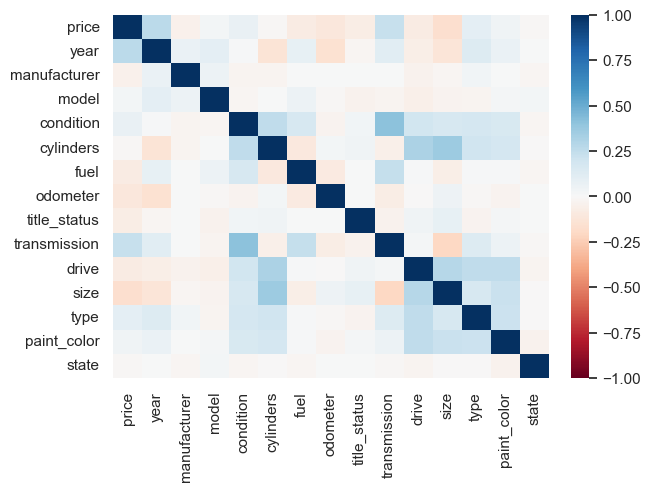

In [24]:
# Let's reexamine the correlation heatmap after cleaning up the outliers and missing values.
show_correlation(df, show_heatmap=True)

## Findings


### Selection of Dataset for Continued Analysis

The Carvana dataset provides very few columns(`Name,Year,Miles,Price`), and a much smaller set of samples than the other datasets.

The CarGurus dataset has the largest rows and the most feature columns avaiable(at 66).
However, it only provides location data as zip code, longitude and latitude, which would make analyzing the effect on price from different areas more difficult since would prefer to just compare prices across US states.

Both the Craigslist and Carvana datasets have some data cleaning work required to remove outliers as well as signficiant numbers of null values.

The TrueCar dataset is by far the cleanest dataset, having no null values, and more columsn than the Carvana dataset. However, the columns available would only allow some of the investigations we have in mind. 
It provides Price,Year,Mileage,City,State,Vin,Make,Model. Vin is of little use without advanced preprocessing based on VIN coding, so the only advantage in features it providese to the Carvana dataset are from location based on `City, State`.

The Craigslist dataset is most amenable to the investigations planned in terms of the columns available. This is because it includes a column for the state location, the same basic make,  model, price, mileage and year information common to all the datasets, but also has a number of additional feature columns which may affect price.
The complete columns are: 
`id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,  fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,
description,county,state,lat,long,posting_date`

The rest of our discussion will focus on the Craigslist dataset specifically.

### Conclusions from Visualizations

The pair plots show that price is related significantly to the year and odomoter values.

The histograms for price and odometer show distributions skewed towards more frequent values on the lower side, while the histogram for the year shows a distribution skewed towards more frequent higher (recent) years.



### Features

It is clear from the correlation values that price is correlated with year of the car. And it is also apparent that the odomoter mileage is negatively correlated with the price. These are not surprising findings.

Other relationships are less obvious from the graphs. This is likely to be partly due to most of the features being categorical and not necessarily ordered in a meaningfull way before correlations were calculated.

There are a significant number of null values remaining in the categorical data after the data cleaning we have already done. For example, cylinders column is missing in over 41% of the rows.

#### Null Value Proportion by Column

    price           0.000000
    year            0.002588
    manufacturer    0.039755
    model           0.011291
    condition       0.396377
    cylinders       0.417314
    fuel            0.006351
    odometer        0.011997
    title_status    0.020936
    transmission    0.006351
    drive           0.312162
    size            0.717008
    type            0.215949
    paint_color     0.310750
    state           0.000000




## Limitations

During this phase used sampled 1% of the larger datasets to speed up initial analysis and debugging of code.
Phase two of the project will use the full Craigslist dataset.

Only preliminary data cleaning has been done. Imputation for missing values that remain is still needed.

## Phase Two Plans

The data is able to support most of the investigations planned for phase two.

Specifically, for phase two we will go deeper into answering these questions:

- How much make and model, condition and other features affect prices of vehicles of the same age. 
- How location affects the price of similar vehicles.
- How well a regression model built for this data will perform on test data.
- Which features are most useful for a regression model.

However, I was not able to locate datasets suitable to measuring the relationship between new car sales and used car prices.

For phase two of the project, the plan is to:

1. Begin by comleting data cleanup of the Craigslist dataset, especially imputation of missing categorical feature values.
2. Continue exploratory data analysis into the price effect of different features.
3. Create a baseline linear regression model to predict price.
4. Create lasso and ridge regression models for price to see how they compare to baseline.
5. Use XGBoost library to create a regression model and also evaluate feature importance.
6. Create a report and presentation based on the findings.

If time is available to do additional work beyond the plan above, then I also plan to evaluate using Random Cut Forest for regression and evaluating feature importance and compare the results with XGBoost.

Lastly, time permitting, I plan to use [Streamlit.io](https://streamlit.io/) to create a web interface for serving an inference endpoint so that a user can input the feature values for a used car and see the price the model predicts.

The report and code to reproduce it will be available via GitHub to interested parties(professor, classmates, other peers) as well as stakeholders interested in how predictable used car prices are with this model who can view the report and use the online inference web interface.

